W zwiƒÖzku ze zbli≈ºajƒÖcymi siƒô wyborami prezydenckimi 2025 postanowi≈Çem przeprowadziƒá szybki, ale pog≈Çƒôbiony przeglƒÖd komentarzy zamieszczanych przez u≈ºytkownik√≥w YouTube w kontek≈õcie debaty prezydenckiej. Celem projektu by≈Ço uchwycenie autentycznych emocji, opinii oraz sposobu postrzegania kandydat√≥w przez spo≈Çeczno≈õƒá internetowƒÖ ‚Äî poza oficjalnymi narracjami medialnymi i tradycyjnymi sonda≈ºami.

Analizie poddano 141 136 komentarzy zebranych z 330 losowo wybranych film√≥w opublikowanych w ciƒÖgu ostatniego tygodnia, zawierajƒÖcych w tytule frazƒô ‚Äûdebata prezydencka‚Äù. R√≥≈ºnorodno≈õƒá ≈∫r√≥de≈Ç i losowy charakter doboru materia≈Ç√≥w pozwoli≈Çy uchwyciƒá szerokie spektrum opinii ‚Äî od emocjonalnych deklaracji poparcia, przez konstruktywnƒÖ krytykƒô, po komentarze nacechowane hejtem czy ironiƒÖ.

Analiza zosta≈Ça przeprowadzona z wykorzystaniem technologii przetwarzania jƒôzyka naturalnego (NLP), co umo≈ºliwi≈Ço automatyczne i precyzyjne wydobycie z komentarzy takich informacji jak:

‚Äì deklaracje poparcia dla konkretnych kandydat√≥w
‚Äì emocje wyra≈ºone w komentarzach (zar√≥wno pozytywne, jak i negatywne)
‚Äì najczƒô≈õciej poruszane tematy i wƒÖtki
‚Äì przezwiska oraz prze≈õmiewcze okre≈õlenia kandydat√≥w
‚Äì czƒôsto≈õƒá u≈ºycia hase≈Ç i slogan√≥w wyborczych

W trosce o przejrzysto≈õƒá procesu analitycznego, ca≈Çy kod ≈∫r√≥d≈Çowy, opis metodologii oraz dane pomocnicze zosta≈Çy udostƒôpnione bezpo≈õrednio w notebooku. Pliki te ‚Äî wraz z pe≈Çnym repozytorium projektu ‚Äî sƒÖ dostƒôpne na moim profilu GitHub https://github.com/lukaszpochmara/Analiza-Sentymentu-wybory, umo≈ºliwiajƒÖc ka≈ºdemu weryfikacjƒô, replikacjƒô lub rozwiniƒôcie analizy.

Choƒá projekt nie ma charakteru reprezentatywnego dla og√≥≈Çu spo≈Çecze≈Ñstwa ‚Äî opiera siƒô bowiem wy≈ÇƒÖcznie na g≈Çosach u≈ºytkownik√≥w YouTube ‚Äî to stanowi ciekawe i warto≈õciowe ≈∫r√≥d≈Ço wiedzy o nastrojach spo≈Çecznych obecnych w przestrzeni cyfrowej.

Celem projektu by≈Ço pokazanie, ≈ºe:

‚Äì sonda≈ºe telewizyjne nie zawsze oddajƒÖ realne emocje spo≈Çeczne, a czƒôsto je upraszczajƒÖ
‚Äì komentarze internetowe sƒÖ ≈∫r√≥d≈Çem bardziej bezpo≈õrednich, szczerych reakcji
‚Äì nawet mniejsze komitety i postacie spoza g≈Ç√≥wnego nurtu mogƒÖ silnie rezonowaƒá w mediach spo≈Çeczno≈õciowych, kszta≈ÇtujƒÖc debatƒô publicznƒÖ

Wybory to nie tylko przywilej, ale i odpowiedzialno≈õƒá. Ka≈ºdy g≈Ços, szczeg√≥lnie w pierwszej turze, ma znaczenie. To w≈Ça≈õnie wtedy mogƒÖ pojawiƒá siƒô nowe si≈Çy polityczne i szansa na realnƒÖ zmianƒô.

Zachƒôcam do g≈Çosowania zgodnie z w≈Çasnym sumieniem, do samodzielnego my≈õlenia i nieulegania medialnym narracjom. BƒÖd≈∫my aktywnymi uczestnikami debaty publicznej ‚Äî z odwagƒÖ, ale i szacunkiem.

Nasze decyzje przy urnie wyborczej kszta≈ÇtujƒÖ przysz≈Ço≈õƒá tego kraju. Nie dajmy, by kto≈õ wybra≈Ç za nas. 

In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

c:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
! yt-dlp "ytsearch1000:debata prezydencka after:2025-05-07" 

In [ ]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

downloader = YoutubeCommentDownloader()
plik_wejsciowy = "debata_filmy.txt"
wszystkie_komentarze = []

with open(plik_wejsciowy, encoding="utf-8") as f:
    for linia in f:
        try:
            _, video_id, _ = linia.strip().split(" ||| ")
            print(f"Pobieram komentarze dla: {video_id}")
            url = f"https://www.youtube.com/watch?v={video_id}"

            for komentarz in downloader.get_comments_from_url(url, sort_by=0):
                wszystkie_komentarze.append({
                    "video_id": video_id,
                    "time": komentarz["time"],
                    "author": komentarz["author"],
                    "text": komentarz["text"]
                })

        except Exception as e:
            print(f"B≈ÇƒÖd przy {linia.strip()}: {e}")

# Zapis do pliku CSV
df = pd.DataFrame(wszystkie_komentarze)
df.to_csv("komentarze_debaty.csv", index=False, encoding="utf-8-sig")
print("‚úÖ Gotowe! Komentarze zapisane do komentarze_debaty.csv")

In [30]:
print(df.columns)

Index(['time', 'author', 'text'], dtype='object')


In [42]:
import pandas as pd
import re


df = pd.read_csv("komentarze_debaty.csv")  

text = " ".join(df["text"].astype(str).tolist()).lower()

kandydaci = {
    "Karol Nawrocki": ["nawrocki", "nawrockiego", "nawrockiemu", "nawrockim", "nawrockich"],
    "S≈Çawomir Mentzen": ["mentzen", "mentzena", "mentzenowi", "mentzenem", "mentzenie"],
    "Szymon Ho≈Çownia": ["ho≈Çownia", "ho≈Çowni", "ho≈Çowniƒô", "ho≈ÇowniƒÖ", "ho≈Çownio"],
    "Grzegorz Braun": ["braun", "brauna", "braunowi", "braunem", "braunie"],
    "Krzysztof Stanowski": ["stanowski", "stanowskiego", "stanowskiemu", "stanowskim", "stanowskich"],
    "Rafa≈Ç Trzaskowski": ["trzaskowski", "trzaskowskiego", "trzaskowskiemu", "trzaskowskim", "trzaskowskich"],
    "Marek Woch": ["woch", "wocha", "wochowi", "wochem", "wochu"],
    "Marek Jakubiak": ["jakubiak", "jakubiaka", "jakubiakowi", "jakubiakiem", "jakubiaku"],
    "Artur Bartoszewicz": ["bartoszewicz", "bartoszewicza", "bartoszewiczowi", "bartoszewiczem", "bartoszewiczu"],
    "Joanna Senyszyn": ["senyszyn"],
    "Adrian Zandberg": ["zandberg", "zandberga", "zandbergowi", "zandbergiem", "zandbergu"],
    "Magdalena Biejat": ["biejat"],
    "Macej Maciak": ["maciak", "maciaka", "maciakowi", "maciakiem", "maciaku"]

}

# Liczenie wystƒÖpie≈Ñ wszystkich form nazwisk
wyniki = {}
for nazwisko, formy in kandydaci.items():
    suma = 0
    for forma in formy:
        suma += len(re.findall(rf"\b{forma}\b", text))
    wyniki[nazwisko] = suma

# Posortowany wynik
for nazwisko, liczba in sorted(wyniki.items(), key=lambda x: x[1], reverse=True):
    print(f"{nazwisko}: {liczba}")


Grzegorz Braun: 16166
Rafa≈Ç Trzaskowski: 10916
S≈Çawomir Mentzen: 8437
Karol Nawrocki: 7317
Krzysztof Stanowski: 6951
Szymon Ho≈Çownia: 4781
Macej Maciak: 4101
Artur Bartoszewicz: 3091
Marek Jakubiak: 1840
Magdalena Biejat: 1743
Adrian Zandberg: 1624
Joanna Senyszyn: 1441
Marek Woch: 701


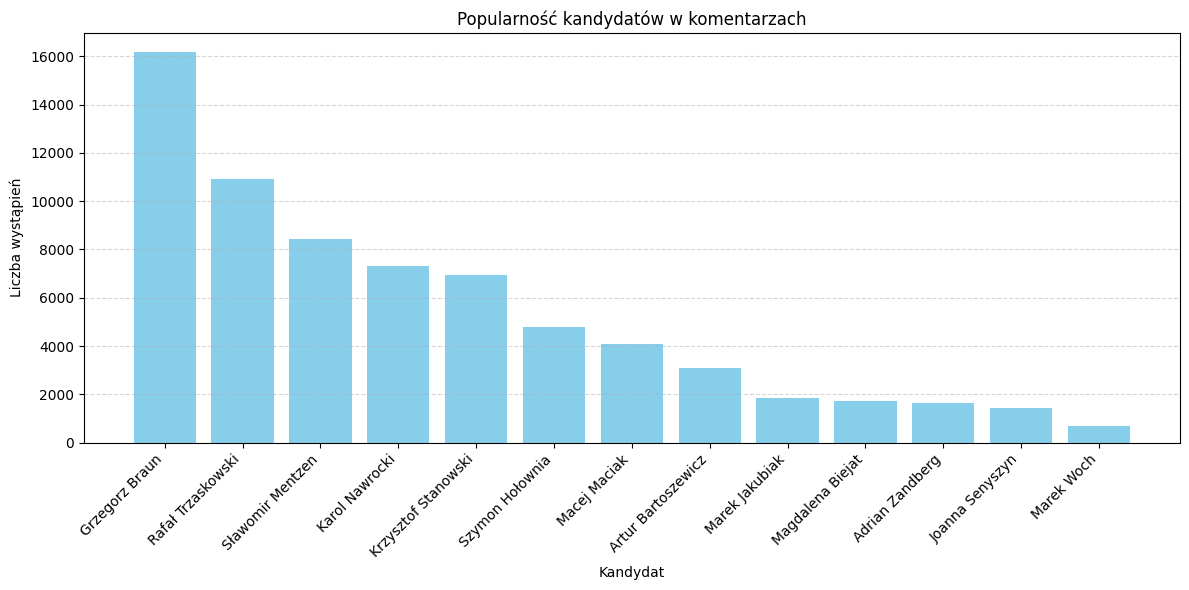

In [43]:
import matplotlib.pyplot as plt

# Za≈Ç√≥≈ºmy, ≈ºe masz ju≈º zmiennƒÖ `wyniki` z poprzedniego kroku:
# np. wyniki = {"S≈Çawomir Mentzen": 10, "Szymon Ho≈Çownia": 9, ...}

# Posortuj dane malejƒÖco
sorted_wyniki = dict(sorted(wyniki.items(), key=lambda x: x[1], reverse=True))

# Wykres
plt.figure(figsize=(12, 6))
plt.bar(sorted_wyniki.keys(), sorted_wyniki.values(), color='skyblue')
plt.title("Popularno≈õƒá kandydat√≥w w komentarzach")
plt.xlabel("Kandydat")
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [54]:
import pandas as pd
import re

# Wczytanie danych
df = pd.read_csv("komentarze_debaty.csv")  # upewnij siƒô, ≈ºe kolumna to 'text'

# Ustawienia
synonimy_glosowania = [
   "zag≈Çosujƒô", "zaglosuje", "g≈Çosujƒô", "glosuje", "oddajƒô g≈Ços", "oddam g≈Ços",
    "oddaje g≈Ços", "odda≈Çem g≈Ços", "zag≈Çosowa≈Çem", "g≈Ços na", "m√≥j g≈Ços dla",
    "popieram", "popar≈Çem", "popieram kandydaturƒô", "jestem za", "jestem z",
    "stawiam na", "wybieram", "m√≥j wyb√≥r", "bƒôdƒô g≈Çosowaƒá", "bƒôdƒô g≈Çosowa≈Ç",
    "moje poparcie", "m√≥j kandydat", "m√≥j faworyt", "g≈Çosujƒô na", "g≈Ços dla",
    "mam zamiar g≈Çosowaƒá", "g≈Ços oddany", "stojƒô za", "idƒô na wybory dla", 
    "bƒôdƒô g≈Çosowaƒá na", "m√≥j g≈Ços idzie na", "liczƒô na", "trzymam kciuki za",
    "pe≈Çne poparcie", "ca≈Çym sercem za", "kandydat godny poparcia", "zdecydowanie za"
]

kandydaci = {
    "Karol Nawrocki": ["nawrocki", "nawrockiego", "nawrockiemu", "nawrockim", "nawrockich"],
    "S≈Çawomir Mentzen": ["mentzen", "mentzena", "mentzenowi", "mentzenem", "mentzenie"],
    "Szymon Ho≈Çownia": ["ho≈Çownia", "ho≈Çowni", "ho≈Çowniƒô", "ho≈ÇowniƒÖ", "ho≈Çownio"],
    "Grzegorz Braun": ["braun", "brauna", "braunowi", "braunem", "braunie"],
    "Krzysztof Stanowski": ["stanowski", "stanowskiego", "stanowskiemu", "stanowskim", "stanowskich"],
    "Rafa≈Ç Trzaskowski": ["trzaskowski", "trzaskowskiego", "trzaskowskiemu", "trzaskowskim", "trzaskowskich"],
    "Marek Woch": ["woch", "wocha", "wochowi", "wochem", "wochu"],
    "Marek Jakubiak": ["jakubiak", "jakubiaka", "jakubiakowi", "jakubiakiem", "jakubiaku"],
    "Artur Bartoszewicz": ["bartoszewicz", "bartoszewicza", "bartoszewiczowi", "bartoszewiczem", "bartoszewiczu"],
    "Joanna Senyszyn": ["senyszyn"],
    "Adrian Zandberg": ["zandberg", "zandberga", "zandbergowi", "zandbergiem", "zandbergu"],
    "Magdalena Biejat": ["biejat"],
    "Maciej Maciak": ["maciak", "maciaka", "maciakowi", "maciakiem", "maciaku"]
}

# Inicjalizacja wyniku
deklaracje_glosu = {k: 0 for k in kandydaci}

# Analiza komentarzy
for komentarz in df["text"].astype(str):
    komentarz_lower = komentarz.lower()
    for kandydat, formy in kandydaci.items():
        if any(re.search(rf"\b{forma}\b", komentarz_lower) for forma in formy):
            if any(slowo in komentarz_lower for slowo in synonimy_glosowania):
                deklaracje_glosu[kandydat] += 1

# Wy≈õwietlenie wynik√≥w
for kandydat, liczba in sorted(deklaracje_glosu.items(), key=lambda x: x[1], reverse=True):
    print(f"{kandydat}: {liczba} deklaracji g≈Çosu")


Grzegorz Braun: 597 deklaracji g≈Çosu
S≈Çawomir Mentzen: 314 deklaracji g≈Çosu
Rafa≈Ç Trzaskowski: 311 deklaracji g≈Çosu
Karol Nawrocki: 259 deklaracji g≈Çosu
Krzysztof Stanowski: 139 deklaracji g≈Çosu
Maciej Maciak: 133 deklaracji g≈Çosu
Artur Bartoszewicz: 119 deklaracji g≈Çosu
Szymon Ho≈Çownia: 88 deklaracji g≈Çosu
Magdalena Biejat: 81 deklaracji g≈Çosu
Adrian Zandberg: 77 deklaracji g≈Çosu
Marek Jakubiak: 67 deklaracji g≈Çosu
Joanna Senyszyn: 49 deklaracji g≈Çosu
Marek Woch: 19 deklaracji g≈Çosu


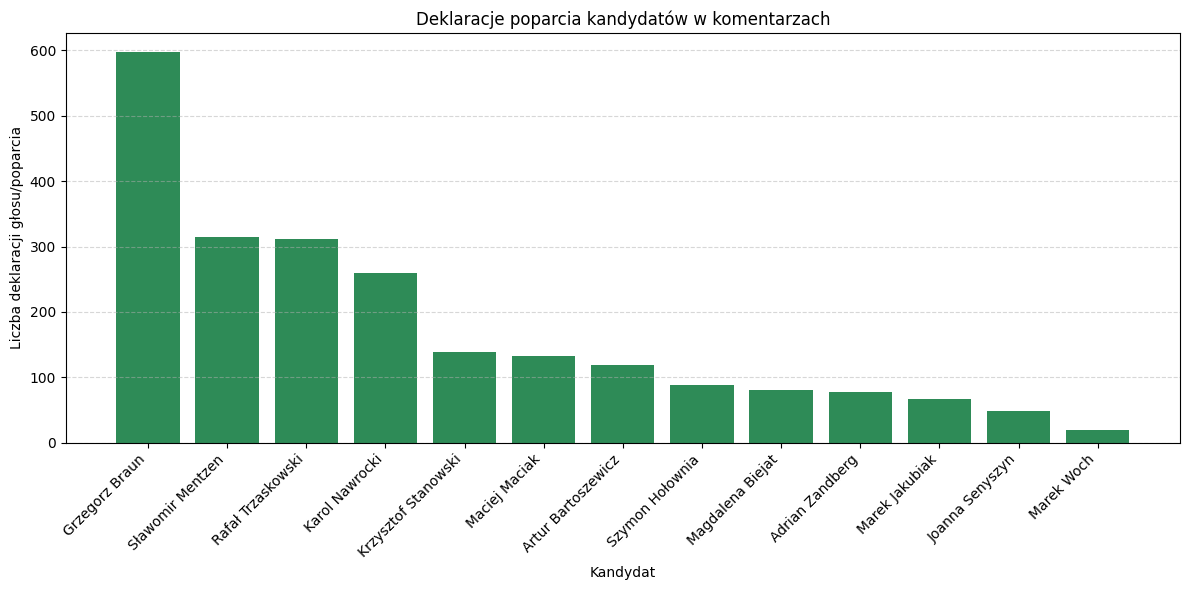

In [55]:
sorted_deklaracje = dict(sorted(deklaracje_glosu.items(), key=lambda x: x[1], reverse=True))

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(sorted_deklaracje.keys(), sorted_deklaracje.values(), color='seagreen')
plt.title("Deklaracje poparcia kandydat√≥w w komentarzach")
plt.xlabel("Kandydat")
plt.ylabel("Liczba deklaracji g≈Çosu/poparcia")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [56]:
synonimy_przegranej = [
    # Klasyczne przegranie
    "przegra", "przegrywa", "przegra≈Ç", "przegrany", "poleg≈Ç", "przepad≈Ç", "odpad≈Ç", "wyeliminowany",
    "pokonany", "nie wygra", "nie da≈Ç rady", "dosta≈Ç baty", "zosta≈Ç rozbity",

    # Pora≈ºka / kompromitacja
    "pora≈ºka", "kompromitacja", "wstyd", "≈ºenada", "obciach", "katastrofa", "dramat", "≈ºa≈Çosny", "sko≈Ñczony",
    "dosta≈Ç po twarzy", "rozjechany", "zmia≈ºd≈ºony", "zniszczony", "zosta≈Ç zniszczony",

    # "Zaorany" styl YouTube / memy
    "zaorany", "zaorali go", "zrobili go", "zgaszony", "wy≈ÇƒÖczony", "wyoutowany", "cisza po nim", "le≈ºy", "wdeptany",

    # S≈Çabo≈õƒá
    "s≈Çaby", "s≈Çabszy", "bez szans", "niewidoczny", "nieistotny", "nic nie pokaza≈Ç", "beznadziejny", "nie istnia≈Ç",
    "by≈Ç cienki", "dno", "nie mia≈Ç podej≈õcia", "pƒôk≈Ç", "poda≈Ç siƒô",

    # Nieprzygotowanie
    "nieprzygotowany", "nie gotowy", "nie ogarnia≈Ç", "nie ogarnia", "zagubiony", "mota≈Ç siƒô", "plƒÖta≈Ç siƒô",
    "nie wiedzia≈Ç co m√≥wi", "nie umia≈Ç siƒô wys≈Çowiƒá", "nieprzekonujƒÖcy", "chaotyczny", "brak konkret√≥w"
]

In [57]:
# Inicjalizacja wyniku
deklaracje_przegranej = {k: 0 for k in kandydaci}

# Analiza komentarzy
for komentarz in df["text"].astype(str):
    komentarz_lower = komentarz.lower()
    for kandydat, formy in kandydaci.items():
        if any(re.search(rf"\b{forma}\b", komentarz_lower) for forma in formy):
            if any(slowo in komentarz_lower for slowo in synonimy_przegranej):
                deklaracje_przegranej[kandydat] += 1

# Wy≈õwietlenie wynik√≥w
for kandydat, liczba in sorted(deklaracje_przegranej.items(), key=lambda x: x[1], reverse=True):
    print(f"{kandydat}: {liczba} deklaracji przegranej")

Rafa≈Ç Trzaskowski: 1262 deklaracji przegranej
Grzegorz Braun: 799 deklaracji przegranej
Karol Nawrocki: 702 deklaracji przegranej
S≈Çawomir Mentzen: 687 deklaracji przegranej
Krzysztof Stanowski: 593 deklaracji przegranej
Szymon Ho≈Çownia: 518 deklaracji przegranej
Maciej Maciak: 282 deklaracji przegranej
Magdalena Biejat: 261 deklaracji przegranej
Artur Bartoszewicz: 194 deklaracji przegranej
Adrian Zandberg: 159 deklaracji przegranej
Marek Jakubiak: 155 deklaracji przegranej
Joanna Senyszyn: 136 deklaracji przegranej
Marek Woch: 74 deklaracji przegranej


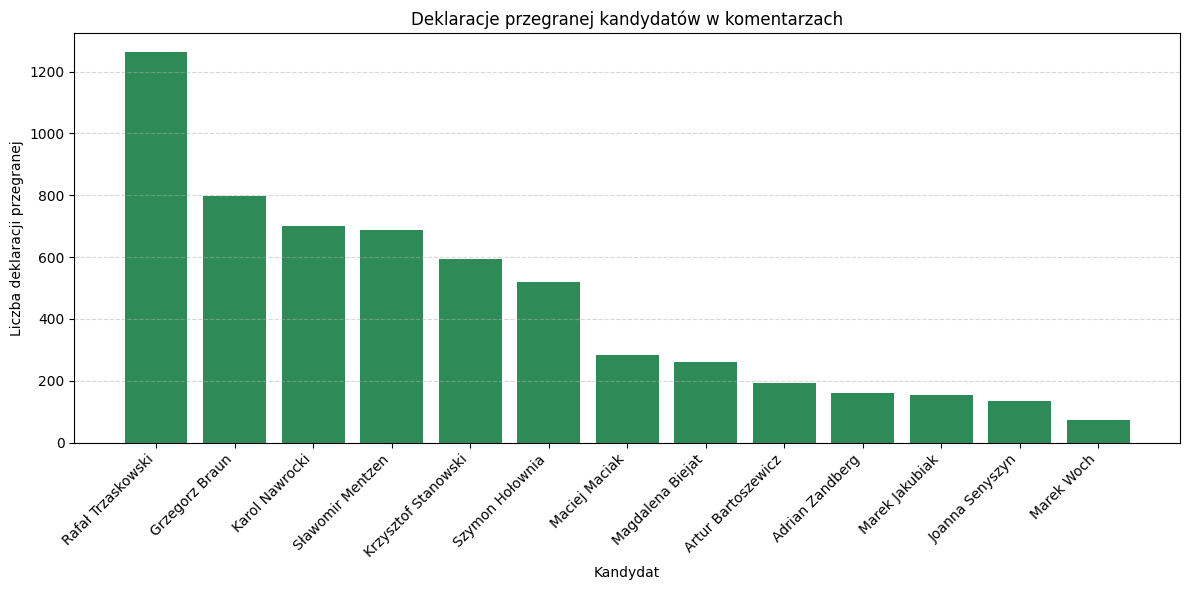

In [95]:
# Posortowanie wynik√≥w deklaracji przegranej kandydat√≥w w kolejno≈õci malejƒÖcej
sorted_deklaracje_przegranej = dict(sorted(deklaracje_przegranej.items(), key=lambda x: x[1], reverse=True))

# Tworzenie wykresu przedstawiajƒÖcego deklaracje przegranej kandydat√≥w
plt.figure(figsize=(12, 6))
plt.bar(sorted_deklaracje_przegranej.keys(), sorted_deklaracje_przegranej.values(), color='seagreen')
plt.title("Deklaracje przegranej kandydat√≥w w komentarzach")
plt.xlabel("Kandydat")
plt.ylabel("Liczba deklaracji przegranej")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [59]:
styl_pozytywny = [
    "konkretny", "merytoryczny", "opanowany", "spokojny", "zr√≥wnowa≈ºony", "przygotowany",
    "logiczny", "jasny przekaz", "dobrze m√≥wi", "m√≥wi do rzeczy", "trafny", "przemy≈õlany",
    "z klasƒÖ", "profesjonalny", "naturalny", "autentyczny", "przekonujƒÖcy", "rzeczowy",
    "zwiƒôz≈Çy", "na temat", "bez lania wody", "dobrze siƒô wypowiada", "wywa≈ºony",
    "inteligentny", "pouk≈Çadany", "klarowny", "p≈Çynny", "dok≈Çadny"
]

In [60]:
# Inicjalizacja wyniku
deklaracje_pozytywne = {k: 0 for k in kandydaci}

# Analiza komentarzy
for komentarz in df["text"].astype(str):
    komentarz_lower = komentarz.lower()
    for kandydat, formy in kandydaci.items():
        if any(re.search(rf"\b{forma}\b", komentarz_lower) for forma in formy):
            if any(slowo in komentarz_lower for slowo in styl_pozytywny):
                deklaracje_pozytywne[kandydat] += 1

# Wy≈õwietlenie wynik√≥w
for kandydat, liczba in sorted(deklaracje_pozytywne.items(), key=lambda x: x[1], reverse=True):
    print(f"{kandydat}: {liczba} deklaracji pozytywnych")

Grzegorz Braun: 353 deklaracji pozytywnych
Rafa≈Ç Trzaskowski: 307 deklaracji pozytywnych
Karol Nawrocki: 248 deklaracji pozytywnych
Krzysztof Stanowski: 239 deklaracji pozytywnych
S≈Çawomir Mentzen: 228 deklaracji pozytywnych
Artur Bartoszewicz: 173 deklaracji pozytywnych
Szymon Ho≈Çownia: 141 deklaracji pozytywnych
Marek Jakubiak: 90 deklaracji pozytywnych
Maciej Maciak: 75 deklaracji pozytywnych
Adrian Zandberg: 70 deklaracji pozytywnych
Magdalena Biejat: 51 deklaracji pozytywnych
Joanna Senyszyn: 43 deklaracji pozytywnych
Marek Woch: 33 deklaracji pozytywnych


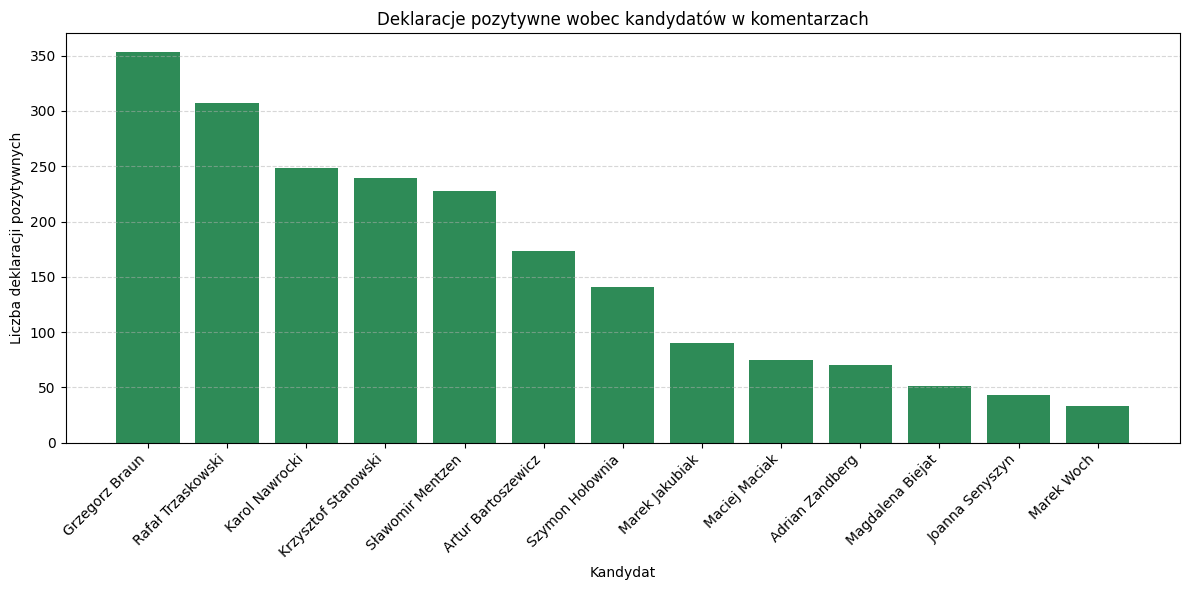

In [99]:
# Posortowanie wynik√≥w deklaracji pozytywnych kandydat√≥w w kolejno≈õci malejƒÖcej
sorted_deklaracje_pozytywne = dict(sorted(deklaracje_pozytywne.items(), key=lambda x: x[1], reverse=True))

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(sorted_deklaracje_pozytywne.keys(), sorted_deklaracje_pozytywne.values(), color='seagreen')
plt.title("Deklaracje pozytywne wobec kandydat√≥w w komentarzach")
plt.xlabel("Kandydat")
plt.ylabel("Liczba deklaracji pozytywnych")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [62]:
synonimy_hejtu = [
    "idiota", "debil", "kretyn", "g≈Çupek", "tuman", "baran", "ciemniak", "g≈Çupi",
    "g≈Çupota", "idiotyzm", "paranoja", "≈ºa≈Çosny", "≈õmieszny", "beznadziejny", "chory",
    "nienormalny", "psychol", "nienawi≈õƒá", "nienawidzƒô", "nikt ciƒô nie lubi",
    "zr√≥b wszystkim przys≈Çugƒô", "zamilcz", "zamknij siƒô", "tylko idioci na niego g≈ÇosujƒÖ",
    "co za pajac", "co za idiota", "jaki debil", "≈ºa≈Çosne", "spadaj", "wypad", "won",
    "oszo≈Çom", "fanatyk", "hitler", "komunista", "lewak", "prawak", "czubek",
    "szkodnik", "zdrajca", "foliarz", "szur", "antyszczep", "prymityw", "mato≈Ç", "burak"
]


In [63]:
# Inicjalizacja wyniku
deklaracje_hejterskie = {k: 0 for k in kandydaci}

# Analiza komentarzy
for komentarz in df["text"].astype(str):
    komentarz_lower = komentarz.lower()
    for kandydat, formy in kandydaci.items():
        if any(re.search(rf"\b{forma}\b", komentarz_lower) for forma in formy):
            if any(slowo in komentarz_lower for slowo in synonimy_hejtu):
                deklaracje_hejterskie[kandydat] += 1

# Wy≈õwietlenie wynik√≥w
for kandydat, liczba in sorted(deklaracje_hejterskie.items(), key=lambda x: x[1], reverse=True):
    print(f"{kandydat}: {liczba} deklaracji hejterskich")

Rafa≈Ç Trzaskowski: 815 deklaracji hejterskich
Grzegorz Braun: 646 deklaracji hejterskich
Karol Nawrocki: 586 deklaracji hejterskich
S≈Çawomir Mentzen: 579 deklaracji hejterskich
Szymon Ho≈Çownia: 492 deklaracji hejterskich
Krzysztof Stanowski: 422 deklaracji hejterskich
Maciej Maciak: 177 deklaracji hejterskich
Marek Jakubiak: 168 deklaracji hejterskich
Magdalena Biejat: 164 deklaracji hejterskich
Adrian Zandberg: 156 deklaracji hejterskich
Artur Bartoszewicz: 140 deklaracji hejterskich
Joanna Senyszyn: 129 deklaracji hejterskich
Marek Woch: 69 deklaracji hejterskich


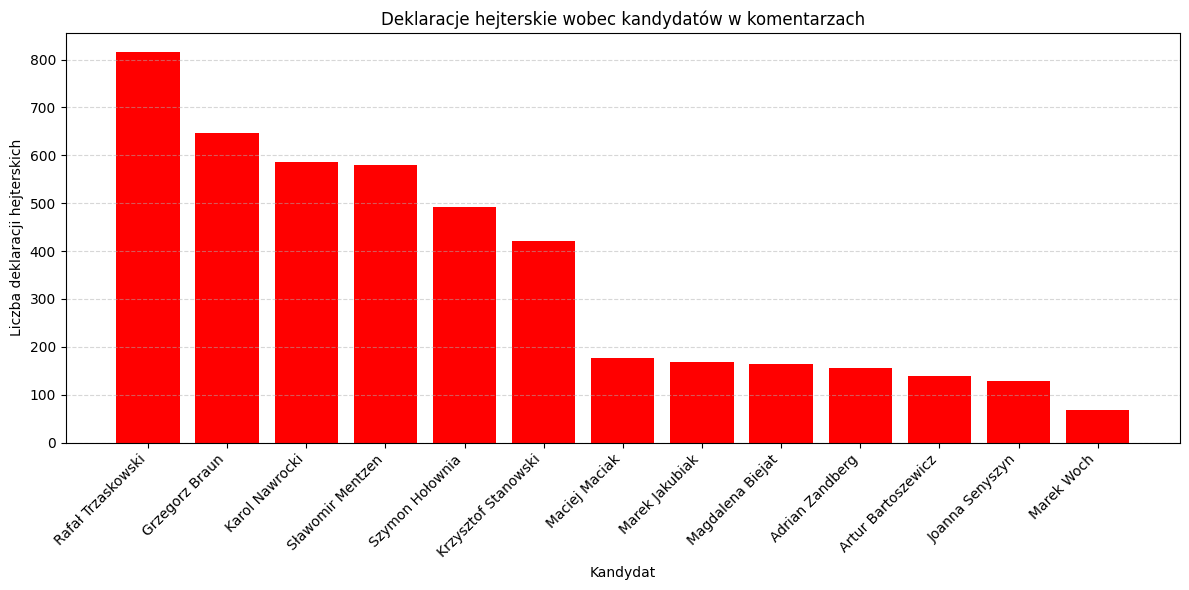

In [64]:
sorted_deklaracje_hejterskie = dict(sorted(deklaracje_hejterskie.items(), key=lambda x: x[1], reverse=True))

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(sorted_deklaracje_hejterskie.keys(), sorted_deklaracje_hejterskie.values(), color='red')
plt.title("Deklaracje hejterskie wobec kandydat√≥w w komentarzach")
plt.xlabel("Kandydat")
plt.ylabel("Liczba deklaracji hejterskich")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [68]:
emocje_negatywne = [
    "≈ºa≈Çosny", "beznadziejny", "≈õmieszny", "chory", "nienormalny", "toksyczny",
    "ohydny", "obrzydliwy", "wstrƒôtny", "niesmaczny", "odra≈ºajƒÖcy", "wredny",
    "z≈Ço≈õliwy", "k≈Çamliwy", "fa≈Çszywy", "niegodny", "podejrzany", "nieludzki",
    "nieszczery", "arogancki", "butny", "chamski", "bezczelny", "zdemoralizowany",
    "skorumpowany", "podejrzany", "opƒôtany", "frustrat", "agresywny", "m≈õciwy",
    "karykaturalny", "gorszy sort", "ha≈Ñba", "≈ºenada", "tragedia", "patologia",
    "katastrofa", "pora≈ºka", "klƒôska", "nƒôdzny", "s≈Çaby", "≈ºa≈Ço≈õƒá", "toksyna",
    "syf", "zgnilizna", "gn√≥j", "przegryw", "nieudacznik", "zwyrol", "s≈Çabiak",
    "bezwarto≈õciowy", "pusty", "nierealny", "nudny", "nieskuteczny", "nierealny",
    "ob≈Çudny", "bzdurny", "≈ºa≈Çosno≈õƒá", "obciach", "dno", "najgorszy", "upadek"
]

In [69]:
# Inicjalizacja wyniku
deklaracje_negatywne = {k: 0 for k in kandydaci}

# Analiza komentarzy
for komentarz in df["text"].astype(str):
    komentarz_lower = komentarz.lower()
    for kandydat, formy in kandydaci.items():
        if any(re.search(rf"\b{forma}\b", komentarz_lower) for forma in formy):
            if any(slowo in komentarz_lower for slowo in emocje_negatywne):
                deklaracje_negatywne[kandydat] += 1

# Wy≈õwietlenie wynik√≥w
for kandydat, liczba in sorted(deklaracje_negatywne.items(), key=lambda x: x[1], reverse=True):
    print(f"{kandydat}: {liczba} deklaracji negatywnych")

Rafa≈Ç Trzaskowski: 873 deklaracji negatywnych
Grzegorz Braun: 611 deklaracji negatywnych
Karol Nawrocki: 498 deklaracji negatywnych
S≈Çawomir Mentzen: 473 deklaracji negatywnych
Krzysztof Stanowski: 460 deklaracji negatywnych
Szymon Ho≈Çownia: 457 deklaracji negatywnych
Maciej Maciak: 223 deklaracji negatywnych
Magdalena Biejat: 171 deklaracji negatywnych
Artur Bartoszewicz: 161 deklaracji negatywnych
Marek Jakubiak: 117 deklaracji negatywnych
Adrian Zandberg: 115 deklaracji negatywnych
Joanna Senyszyn: 101 deklaracji negatywnych
Marek Woch: 52 deklaracji negatywnych


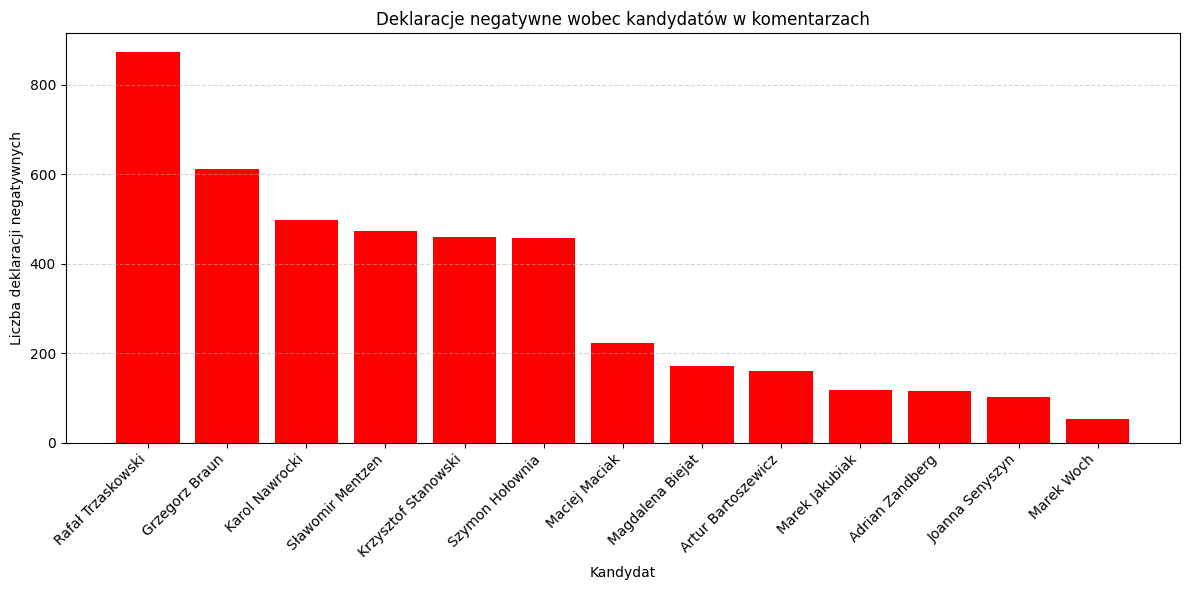

In [70]:
sorted_deklaracje_negatywne = dict(sorted(deklaracje_negatywne.items(), key=lambda x: x[1], reverse=True))

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
plt.bar(sorted_deklaracje_negatywne.keys(), sorted_deklaracje_negatywne.values(), color='red')
plt.title("Deklaracje negatywne wobec kandydat√≥w w komentarzach")
plt.xlabel("Kandydat")
plt.ylabel("Liczba deklaracji negatywnych")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Pobierz s≈Çowniki, je≈õli robisz to pierwszy raz
nltk.download('punkt')
nltk.download('stopwords')

# Wczytaj dane
df = pd.read_csv('komentarze_debaty.csv')

# Zobacz kolumny
print(df.columns)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['video_id', 'time', 'author', 'text'], dtype='object')


In [3]:
# Lista najczƒôstszych polskich s≈Ç√≥w pustych (minimalna wersja)
stop_words = {
    'i', 'oraz', 'a', 'ale', 'czy', 'nie', 'na', 'do', 'w', 'z', 'o', 'to', '≈ºe',
    'jak', 'tak', 'jest', 'sƒÖ', 'byƒá', 'by≈Ç', 'by≈Ça', 'bƒôdzie', 'by', 'dla',
    'tego', 'ten', 'ta', 'co', 'czyli', 'lub', 'go', 'jej', 'jego', 'ich',
    'u', 'od', 'przez', 'po', 'nad', 'pod', 'mi', 'my', 'wy', 'oni', 'one',
    'mnie', 'tobie', 'ciebie', 'kt√≥ra', 'kt√≥ry', 'kt√≥re'
}


In [9]:
import nltk

# Pobierz konkretne zasoby jeszcze raz
nltk.download('stopwords', download_dir='C:/Users/lukas/AppData/Roaming/nltk_data')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/lukas/AppData/Roaming/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
df = pd.read_csv("komentarze_debaty.csv")  

In [57]:
import nltk
nltk.download('punkt') 




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
import re

# Minimalna lista stopwords

stop_words = {
    'i', 'oraz', 'a', 'ale', 'czy', 'nie', 'na', 'do', 'w', 'z', 'o', 'to', '≈ºe',
    'jak', 'tak', 'jest', 'sƒÖ', 'byƒá', 'by≈Ç', 'by≈Ça', 'bƒôdzie', 'by', 'dla',
    'tego', 'ten', 'ta', 'co', 'czyli', 'lub', 'go', 'jej', 'jego', 'ich',
    'u', 'od', 'przez', 'po', 'nad', 'pod', 'mi', 'my', 'wy', 'oni', 'one',
    'mnie', 'tobie', 'ciebie', 'kt√≥ra', 'kt√≥ry', 'kt√≥re', 'te≈º', 'ju≈º', 'no',
    'bo', 'je≈õli', 'gdy', 'wiƒôc', 'wiƒôcej', 'wszyscy', 'wszƒôdzie',
    'bardzo', 'nawet', 'trochƒô', 'mo≈ºe', 'pan', 'pani', 'panie', 'pana', 'by≈Ço',
    'jestem', 'jeste≈õ', 'jeste≈õmy', 'jeste≈õcie', 'siebie', 'sobie', 'on', 'ona',
    'kto', 'czemu', 'dlaczego', 'kim', 'czym', 'tym', 'tam',
    'tutaj', 'tu', 'raz', 'dwa', 'trzy', '≈ºeby', 'nic', 'ka≈ºdy',
    'wszystko', 'swoje', 'sw√≥j', 'swoja', 'swojego', 'swoich', 'siƒô', 'sie',
    'dla', 'to', 'w≈Ça≈õnie', 'jakby', 'takie', 'takich', '≈ºaden', '≈ºadna',
    'ktokolwiek', 'kt√≥regokolwiek', 'jaki≈õ', 'jakƒÖ≈õ', 'jakiego≈õ',
    'by≈Çoby', 'bym', 'by≈õ', 'bƒôdziecie', 'm√≥g≈Ç', 'mog≈Ça', 'm√≥g≈Çby', 'mogliby',
    'czy≈º', 'chocia≈º', 'choƒá', 'aczkolwiek', 'a≈º', 'czy≈ºby', 'r√≥wnie≈º',
    'lecz', 'za', 'na', 'tylko', 'ju≈º', 'jeszcze', 'wtedy', 'w≈Ça≈õnie', 'w≈Ça≈õciwie',
    'ze', 'ja', 'tej', 'jeszcze', 'ty', 'te', 'mu', 'tych', 'gdzie', 'pis', 'teraz',
    'mam', 'ci', 'co≈õ', 'jako', 'lat', 'mo≈ºna', 'chce', 'majƒÖ', 'kto≈õ', 'wszystkich',
    'albo', 'ni≈º', 'mia≈Ç', 'by≈Ço', 'by≈Ça', 'byli', 'by≈Çy', 'bym', 'by≈õ', 'by≈õmy', 'by≈õcie',
    'bƒôdƒÖ', 'bƒôdziemy', 'bƒôdziecie', 'bƒôdziesz', 'bƒôdƒô', 'bƒôdziesz', 'bƒôdziemy', 'bƒôdƒÖ',
    'jest', 'sƒÖ', 'byƒá', 'by≈Ç', 'by≈Ça', 'by≈Ço', 'byli', 'by≈Çy', 'jestem', 'jeste≈õ', 'jeste≈õmy', 'jeste≈õcie',
    'mo≈ºe', 'mo≈ºna', 'muszƒô', 'musisz', 'musimy', 'musicie', 'muszƒÖ', 'trzeba', 'trzeba', 'trzeba', 'trzeba',
    'czy', 'czyli', 'lub', 'albo', 'ani', 'lecz', 'jednak', 'wiƒôc', 'zatem', 'dlatego', 'poniewa≈º', 'gdy≈º',
    'je≈ºeli', 'je≈õli', 'bo', 'poniewa≈º', 'dlatego', 'wiƒôc', 'zatem', 'jednak', 'ale', 'lecz', 'choƒá', 'chocia≈º',
    'a≈º', 'czy≈º', 'czy≈ºby', 'kt√≥ra', 'kt√≥ry', 'kt√≥re', 'kt√≥rzy', 'kt√≥rych', 'kt√≥rym', 'kt√≥rego', 'kt√≥rej', 'kt√≥remu',
    'kt√≥rƒÖ', 'kt√≥rzy', 'kt√≥rƒÖ', 'kt√≥rzy', 'kt√≥rƒÖ', 'kt√≥rzy', 'kt√≥rƒÖ', 'kt√≥rzy', 'kt√≥rƒÖ', 'kt√≥rzy', 'kt√≥rƒÖ', 'kt√≥rzy',
    'ktokolwiek', 'cokolwiek', 'gdziekolwiek', 'kiedykolwiek', 'jakkolwiek', 'ktokolwiek', 'czegokolwiek', 'kimkolwiek',
    'czymkolwiek', 'jakikolwiek', 'jakakolwiek', 'jakiekolwiek', 'jakiegokolwiek', 'jakiejkolwiek', 'jakimkolwiek',
    'jakƒÖkolwiek', 'jakimikolwiek', 'jakimkolwiek', 'jakƒÖkolwiek', 'jakimikolwiek',"ma", "majƒÖ", "majƒÖcy", "majƒÖca", "majƒÖce", "majƒÖcy", "majƒÖca", "majƒÖce",
}


def prosty_tokenizer(tekst):
    # Usuwanie znak√≥w interpunkcyjnych i tokenizacja
    slowa = re.findall(r'\b\w+\b', tekst.lower())
    return ' '.join([s for s in slowa if s not in stop_words])

# Zastosuj do danych
df['text_clean'] = df['text'].apply(prosty_tokenizer)

# Sprawd≈∫
print(df[['text', 'text_clean']].head())


                                                text  \
0  8 sztab√≥w wyborczych by≈Ço przeciw durnej prowa...   
1  Negatywnie oceniam debatƒô, kt√≥rej konstrukcja ...   
2  22:54. Jej wzrok na Stanowskiego ---- bezcenny!!!   
3                              Trzaskowski =0 prawdy   
4  Stanowski ma 100% racji. Obecno≈õƒá pani Schnepf...   

                                          text_clean  
0  8 sztab√≥w wyborczych przeciw durnej prowadzƒÖce...  
1  negatywnie oceniam debatƒô konstrukcja da≈Ça mo≈º...  
2                  22 54 wzrok stanowskiego bezcenny  
3                               trzaskowski 0 prawdy  
4  stanowski 100 racji obecno≈õƒá schnepf debacie o...  


In [59]:
from collections import Counter

# Po≈ÇƒÖcz wszystkie komentarze w jeden ciƒÖg
wszystkie_slowa = ' '.join(df['text_clean']).split()

# Policz czƒôstotliwo≈õƒá
licznik = Counter(wszystkie_slowa)

# Najczƒôstsze 30 s≈Ç√≥w
najczestsze = licznik.most_common(30)

# Wy≈õwietl
for slowo, liczba in najczestsze:
    print(f'{slowo}: {liczba}')


braun: 11386
trzaskowski: 6961
mentzen: 5716
stanowski: 5267
nawrocki: 4963
polski: 4545
prezydenta: 4327
brawo: 4276
grzegorz: 4056
brauna: 3866
ho≈Çownia: 3653
chyba: 3448
dobrze: 3116
ludzie: 3115
bez: 3077
m√≥wi: 3028
trzaskowskiego: 2905
debaty: 2859
xd: 2852
ludzi: 2837
prezydentem: 2576
debata: 2544
maciak: 2422
kandydat√≥w: 2416
polska: 2413
taki: 2363
bartoszewicz: 2268
polsce: 2252
2: 2234
sam: 2209


In [34]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Za≈Çaduj tokenizer i model
model_name = "Voicelab/herbert-base-cased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Mapowanie indeks√≥w na etykiety
id2label = {0: "negative", 1: "neutral", 2: "positive"}

# Wczytaj dane
df = pd.read_csv("probka_komentarzy.csv")
df['text'] = df['text'].astype(str)

# Funkcja do predykcji sentymentu
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probs = outputs.logits.softmax(dim=1).detach().numpy()
    label = id2label[np.argmax(probs)]
    confidence = np.max(probs)
    return label, confidence

# Zastosuj funkcjƒô do danych
df[['sentyment', 'pewno≈õƒá']] = df['text'].apply(lambda x: pd.Series(predict_sentiment(x)))

# Zapisz wyniki do nowego pliku CSV
df.to_csv("pr√≥bka_komentarzy_sentyment.csv", index=False)

# Wy≈õwietl pierwsze 5 wierszy z wynikami
print(df[['text', 'sentyment', 'pewno≈õƒá']].head())


                                                text sentyment   pewno≈õƒá
0                     Tadeusz Sznuk na PREZYDENTA! üòÇ  positive  0.954365
1  Co Ho≈Çownia robi w polityce???????????!??.????...  positive  0.725598
2                                               Siur   neutral  0.518214
3    Nawrocki nie doros≈Ças  do piƒôt TrzaskoskmuüòÖüòÖüòÖüòÖüòÖ  negative  0.755592
4                   Jego Zajebisto≈õƒá Rafa≈Ç IV FajnyüòÜ  positive  0.702223


In [35]:
sentyment_podsumowanie = df['sentyment'].value_counts()
print(sentyment_podsumowanie)


sentyment
negative    3882
positive    3455
neutral     2663
Name: count, dtype: int64


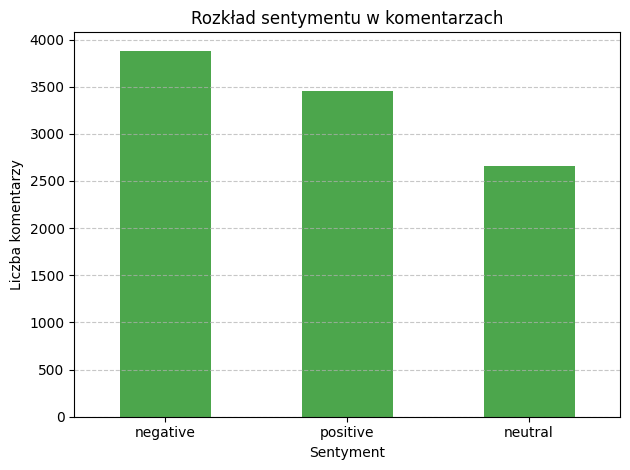

In [ ]:


df['sentyment'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Rozk≈Çad sentymentu w komentarzach')
plt.xlabel('Sentyment')
plt.ylabel('Liczba komentarzy')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [38]:
srednia_pewnosc = df.groupby('sentyment')['pewno≈õƒá'].mean()
print(srednia_pewnosc)


sentyment
negative    0.844746
neutral     0.699807
positive    0.846318
Name: pewno≈õƒá, dtype: float32


In [42]:
# kandydaci ‚Äì s≈Çownik z odmienionymi formami nazwisk
kandydaci = {
    "Karol Nawrocki": ["nawrocki", "nawrockiego", "nawrockiemu", "nawrockim", "nawrockich"],
    "S≈Çawomir Mentzen": ["mentzen", "mentzena", "mentzenowi", "mentzenem", "mentzenie"],
    "Szymon Ho≈Çownia": ["ho≈Çownia", "ho≈Çowni", "ho≈Çowniƒô", "ho≈ÇowniƒÖ", "ho≈Çownio"],
    "Grzegorz Braun": ["braun", "brauna", "braunowi", "braunem", "braunie"],
    "Krzysztof Stanowski": ["stanowski", "stanowskiego", "stanowskiemu", "stanowskim", "stanowskich"],
    "Rafa≈Ç Trzaskowski": ["trzaskowski", "trzaskowskiego", "trzaskowskiemu", "trzaskowskim", "trzaskowskich"],
    "Marek Woch": ["woch", "wocha", "wochowi", "wochem", "wochu"],
    "Marek Jakubiak": ["jakubiak", "jakubiaka", "jakubiakowi", "jakubiakiem", "jakubiaku"],
    "Artur Bartoszewicz": ["bartoszewicz", "bartoszewicza", "bartoszewiczowi", "bartoszewiczem", "bartoszewiczu"],
    "Joanna Senyszyn": ["senyszyn"],
    "Adrian Zandberg": ["zandberg", "zandberga", "zandbergowi", "zandbergiem", "zandbergu"],
    "Magdalena Biejat": ["biejat"],
    "Macej Maciak": ["maciak", "maciaka", "maciakowi", "maciakiem", "maciaku"]
}

# Iteracja przez kandydat√≥w
for kandydat, formy in kandydaci.items():
    # ≈ÅƒÖczenie wszystkich form w jedno wyra≈ºenie regularne
    regex = '|'.join(formy)
    
    # Filtrowanie komentarzy zawierajƒÖcych jakƒÖkolwiek formƒô
    filtrowane = df[df['text'].str.contains(regex, case=False, na=False, regex=True)]
    
    # Zliczenie sentyment√≥w
    print(f"\n--- {kandydat.upper()} ---")
    print(filtrowane['sentyment'].value_counts())



--- KAROL NAWROCKI ---
sentyment
positive    179
negative    168
neutral     115
Name: count, dtype: int64

--- S≈ÅAWOMIR MENTZEN ---
sentyment
negative    193
positive    192
neutral     122
Name: count, dtype: int64

--- SZYMON HO≈ÅOWNIA ---
sentyment
negative    162
positive     72
neutral      62
Name: count, dtype: int64

--- GRZEGORZ BRAUN ---
sentyment
positive    484
negative    301
neutral     228
Name: count, dtype: int64

--- KRZYSZTOF STANOWSKI ---
sentyment
positive    185
negative    167
neutral     118
Name: count, dtype: int64

--- RAFA≈Å TRZASKOWSKI ---
sentyment
negative    323
positive    202
neutral     199
Name: count, dtype: int64

--- MAREK WOCH ---
sentyment
positive    35
negative     9
neutral      7
Name: count, dtype: int64

--- MAREK JAKUBIAK ---
sentyment
positive    65
negative    42
neutral     25
Name: count, dtype: int64

--- ARTUR BARTOSZEWICZ ---
sentyment
positive    99
neutral     51
negative    47
Name: count, dtype: int64

--- JOANNA SENYSZYN --

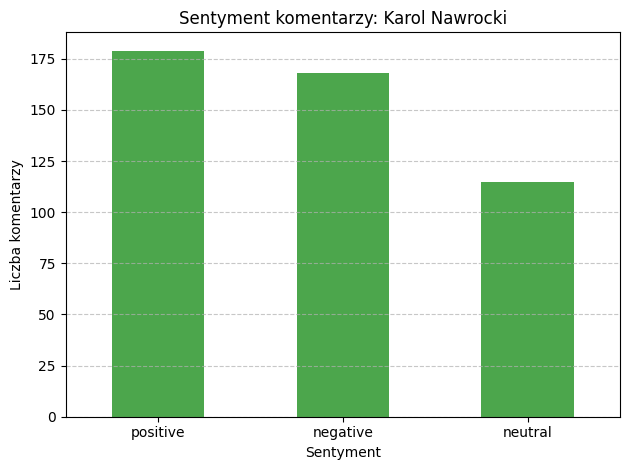

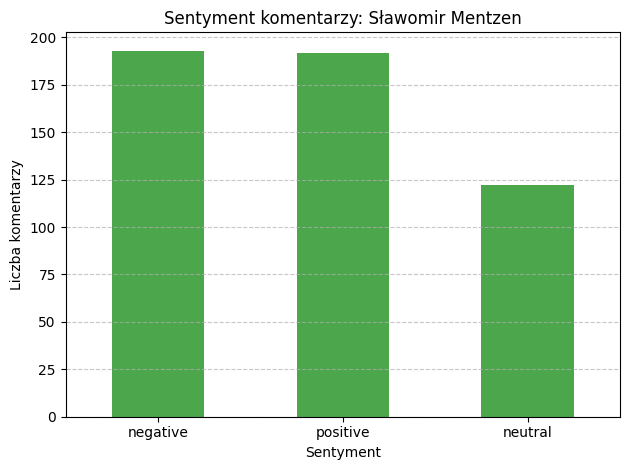

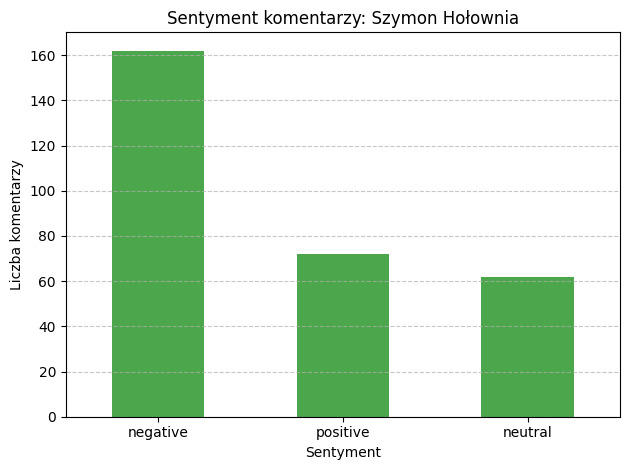

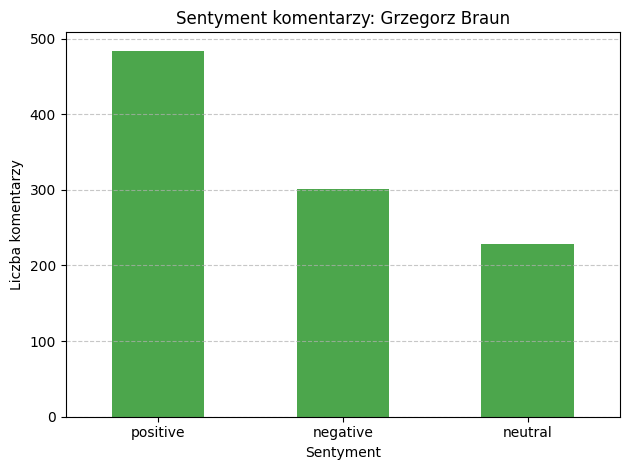

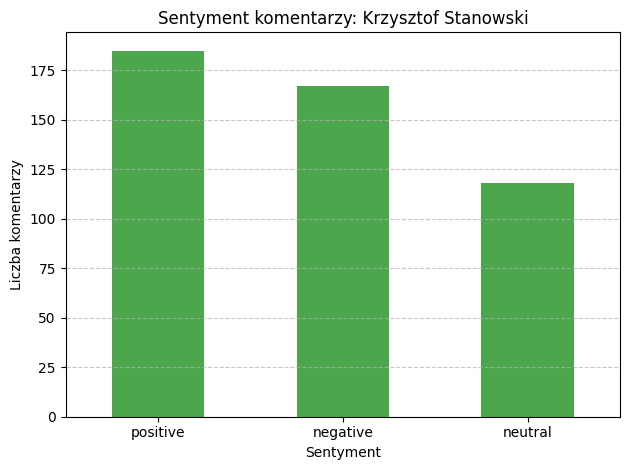

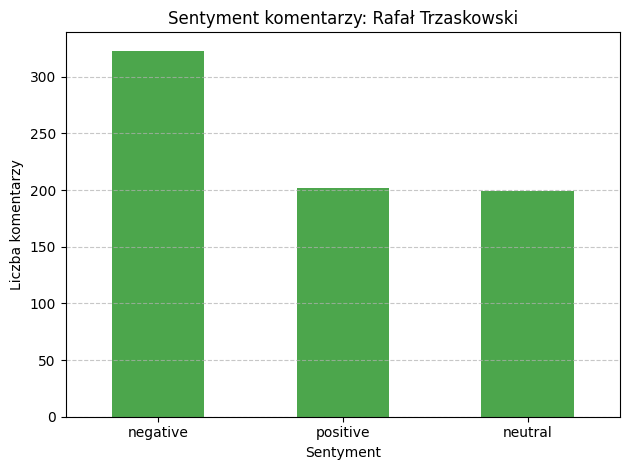

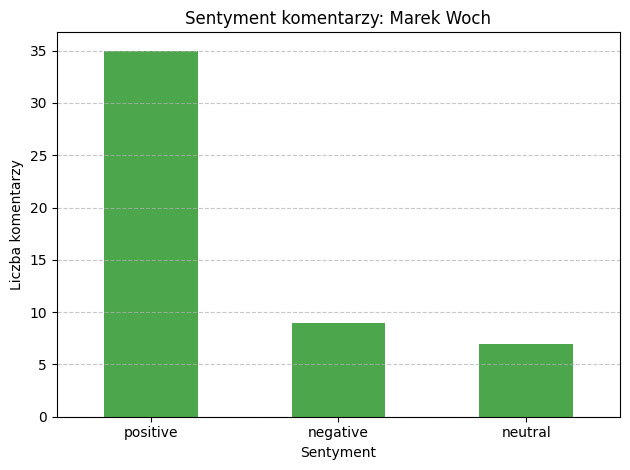

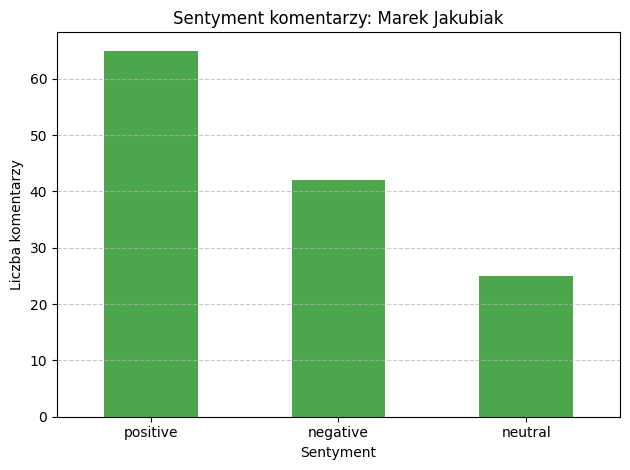

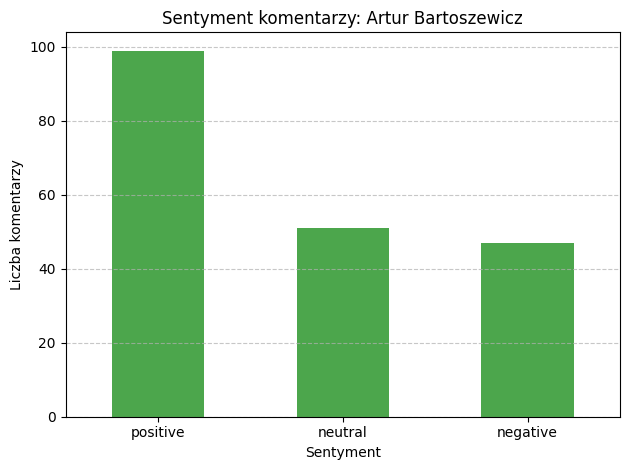

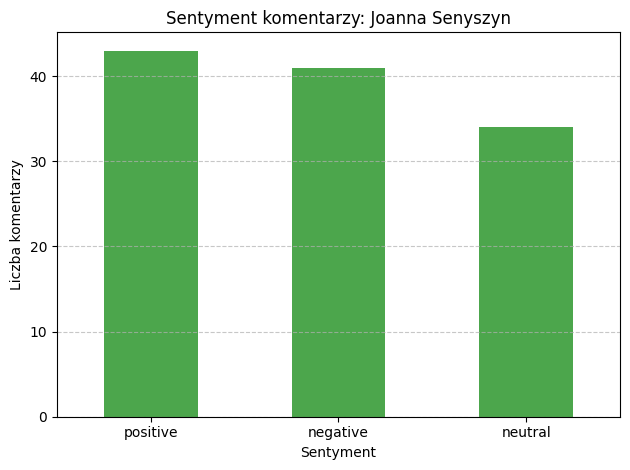

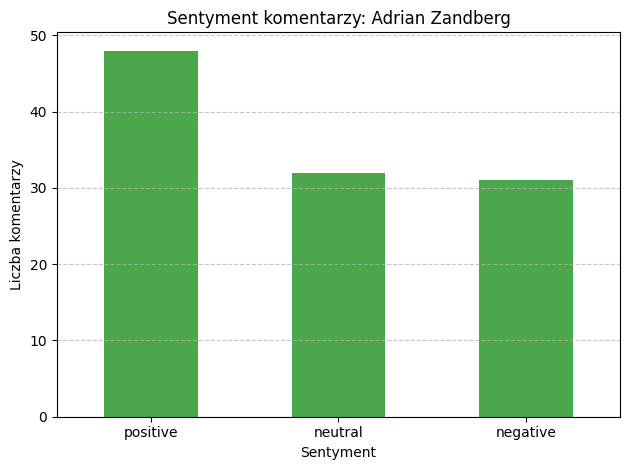

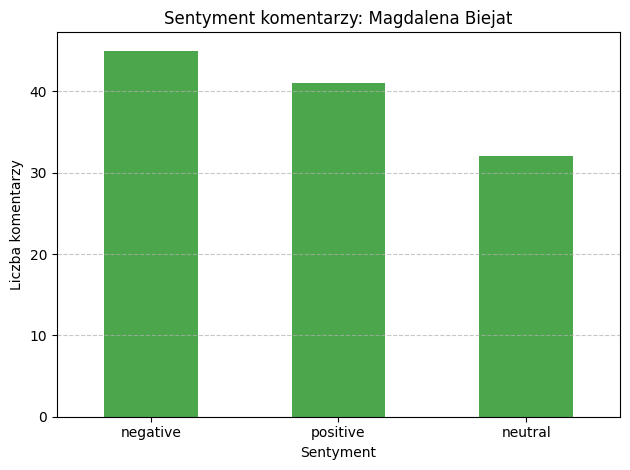

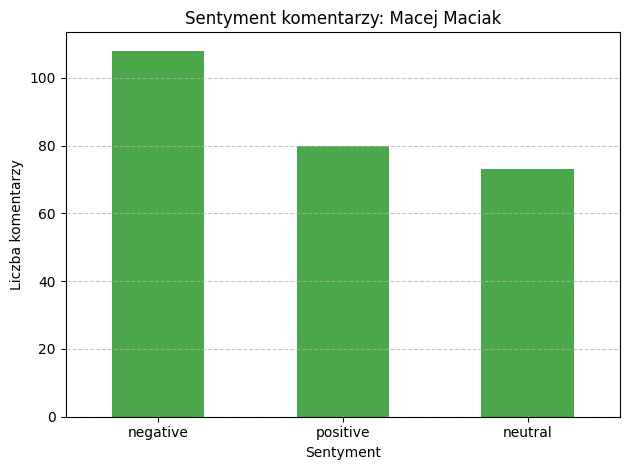

In [48]:



# Tworzenie wykres√≥w
for kandydat, formy in kandydaci.items():
    regex = '|'.join(formy)
    filtrowane = df[df['text'].str.contains(regex, case=False, na=False, regex=True)]
    sentymenty = filtrowane['sentyment'].value_counts()

    # Tworzenie wykresu
    
    sentymenty.plot(kind='bar', color='green', alpha=0.7)
    
    plt.title(f'Sentyment komentarzy: {kandydat}')
    plt.xlabel('Sentyment')
    plt.ylabel('Liczba komentarzy')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


W dobie cyfrowej transformacji ≈ºycia publicznego, prawdziwe pole debaty coraz czƒô≈õciej przenosi siƒô z sal sejmowych i studi√≥w telewizyjnych do przestrzeni internetowej. Platformy takie jak YouTube stajƒÖ siƒô nie tylko ≈∫r√≥d≈Çem informacji, ale r√≥wnie≈º barometrem spo≈Çecznych emocji. To w≈Ça≈õnie w komentarzach ‚Äî czƒôsto niekontrolowanych i spontanicznych ‚Äî odzwierciedla siƒô rzeczywisty puls spo≈Çecze≈Ñstwa. Analiza 141 136 komentarzy zamieszczonych pod filmami z debatƒÖ prezydenckƒÖ 2025 dostarczy≈Ça cennych wniosk√≥w na temat tego, kt√≥rzy kandydaci najbardziej przykuwajƒÖ uwagƒô internaut√≥w, jak sƒÖ odbierani i w jaki spos√≥b siƒô o nich m√≥wi.
Grzegorz Braun ‚Äì lider widoczno≈õci i polaryzacji

Najczƒô≈õciej wymienianym nazwiskiem w komentarzach by≈Ç Grzegorz Braun, co nie powinno dziwiƒá biorƒÖc pod uwagƒô jego kontrowersyjny styl wypowiedzi, radykalne poglƒÖdy i wyrazistƒÖ postawƒô medialnƒÖ. Braun przyciƒÖga uwagƒô zar√≥wno swoich zwolennik√≥w, kt√≥rzy chwalƒÖ go za "niez≈Çomno≈õƒá" i "odwagƒô", jak i przeciwnik√≥w ‚Äî okre≈õlajƒÖcych go mianem "fanatyka", "foliarza" czy "oszo≈Çoma". Co ciekawe, wielu komentator√≥w nie wyra≈ºa≈Ço wobec niego neutralno≈õci ‚Äî jego nazwisko niemal zawsze pojawia≈Ço siƒô w emocjonalnym kontek≈õcie. To pokazuje, jak silnie polaryzujƒÖca postaciƒÖ jest ten kandydat.
S≈Çawomir Mentzen ‚Äì mobilizacja m≈Çodego elektoratu i styl TikTokowy

Na drugim miejscu uplasowa≈Ç  siƒô S≈Çawomir Mentzen, jeden z lider√≥w Konfederacji, kt√≥ry z du≈ºym powodzeniem prowadzi kampaniƒô skierowanƒÖ do m≈Çodego, czƒôsto internetowego elektoratu. Komentarze na jego temat by≈Çy czƒôste i nacechowane du≈ºƒÖ ilo≈õciƒÖ deklaracji poparcia, ale r√≥wnie≈º krytykƒÖ stylu komunikacji, kt√≥ry nie wszystkim przypad≈Ç do gustu. Mentzen jawi≈Ç siƒô w komentarzach jako kandydat "merytoryczny i konkretny" lub przeciwnie ‚Äî jako "sprytny manipulator", kt√≥ry "dobrze m√≥wi, ale nic nie zmieni". Czƒôsto przywo≈Çywano r√≥wnie≈º jego dzia≈Çania w mediach spo≈Çeczno≈õciowych, g≈Ç√≥wnie na TikToku, co czyni go jednym z najnowocze≈õniej komunikujƒÖcych siƒô kandydat√≥w tej kampanii.
Szymon Ho≈Çownia ‚Äì trzecia si≈Ça czy wygasajƒÖca nadzieja?

Na trzecim miejscu w≈õr√≥d najczƒô≈õciej wspominanych nazwisk znalaz≈Ç siƒô Szymon Ho≈Çownia. Komentarze na jego temat czƒôsto odwo≈Çywa≈Çy siƒô do jego przesz≈Ço≈õci dziennikarsko-publicystycznej, a tak≈ºe do wizerunku "umiarkowanego, przyjaznego kandydata", kt√≥ry "nie dzieli, tylko szuka porozumienia". Jednak r√≥wnie czƒôsto pojawia≈Çy siƒô zarzuty o "brak konkret√≥w", "zbyt miƒôkkie podej≈õcie" lub "brak autentyczno≈õci". Ho≈Çownia by≈Ç czƒôsto por√≥wnywany z kandydatami bardziej wyrazistymi, jak Braun czy Mentzen, co unaocznia jego pozycjƒô jako kandydata centrowego, ale byƒá mo≈ºe zbyt ≈Çagodnego, by przyciƒÖgnƒÖƒá emocjonalnie zaanga≈ºowany elektorat.
Kolejni kandydaci: Trzaskowski, Nawrocki, Stanowski

Rafa≈Ç Trzaskowski, choƒá dobrze rozpoznawalny, nie zdoby≈Ç w tej analizie r√≥wnie wysokiego poziomu zaanga≈ºowania w komentarzach. Pojawia≈Ç siƒô w kontek≈õcie zarzut√≥w o "partyjno≈õƒá", "powiƒÖzania z elitami" oraz jako symbol "establishmentu". Jego obecno≈õƒá w analizowanej pr√≥bce by≈Ça czƒô≈õciej neutralna lub negatywna ni≈º entuzjastyczna.

Karol Nawrocki, wspierany przez ob√≥z Prawa i Sprawiedliwo≈õci, by≈Ç komentowany raczej zdawkowo ‚Äî czƒôsto w formie pyta≈Ñ typu "kto to jest?" lub "skƒÖd on siƒô wziƒÖ≈Ç?". Mimo ≈ºe reprezentuje si≈Çy majƒÖce dostƒôp do szerokiego zaplecza medialnego, jego nazwisko nie wywo≈Çywa≈Ço silnych emocji.

Z kolei Krzysztof Stanowski, startujƒÖcy jako kandydat niezale≈ºny i znany dziennikarz sportowy, by≈Ç komentowany g≈Ç√≥wnie w tonie ciekawostki lub internetowego fenomenu. Nie brakowa≈Ço g≈Ços√≥w ≈ºartobliwych, ale i takich, kt√≥re sugerowa≈Çy, ≈ºe jego obecno≈õƒá w debacie "od≈õwie≈ºa" dyskusjƒô publicznƒÖ i przyciƒÖga m≈Çodszych widz√≥w.
Kandydaci z mniejszƒÖ widoczno≈õciƒÖ i rola mem√≥w

W dalszej czƒô≈õci zestawienia znale≈∫li siƒô m.in. Joanna Senyszyn, Adrian Zandberg, Magdalena Biejat, Maciej Maciak czy Piotr Bartoszewicz. Ich nazwiska pojawia≈Çy siƒô znacznie rzadziej i najczƒô≈õciej w komentarzach o charakterze informacyjnym, z rzadka emocjonalnych. W ich przypadku zauwa≈ºalna by≈Ça wiƒôksza liczba przezwisk, skr√≥t√≥w i etykiet ideologicznych, ni≈º pe≈Çnych nazwisk ‚Äî co pokazuje, ≈ºe czƒô≈õƒá kandydat√≥w funkcjonuje w ≈õwiadomo≈õci wyborc√≥w bardziej jako "mem" ni≈º realna alternatywa wyborcza.

Analiza rozk≈Çadu sentymentu w komentarzach dotyczƒÖcych kandydat√≥w na prezydenta pokazuje, ≈ºe dominujƒÖ w nich emocje negatywne. W polskiej debacie publicznej, zw≈Çaszcza w internecie, krytyka, ironia i wy≈õmiewanie sƒÖ znacznie czƒôstsze ni≈º wyrazy uznania czy pozytywne opinie. Komentarze pe≈Çne sƒÖ ostrych ocen, zarzut√≥w o niekompetencjƒô, braku zaufania do polityk√≥w oraz rozczarowania klasƒÖ politycznƒÖ jako ca≈Ço≈õciƒÖ. Pozytywne g≈Çosy ‚Äì choƒá obecne ‚Äì stanowiƒÖ wyra≈∫nƒÖ mniejszo≈õƒá i czƒôsto dotyczƒÖ pojedynczych, wyrazistych postaci lub sƒÖ wyrazem ironii. Taki rozk≈Çad sentymentu nie jest zaskoczeniem w kontek≈õcie polskiej kultury politycznej, gdzie polaryzacja i emocjonalno≈õƒá wypowiedzi sƒÖ na porzƒÖdku dziennym. Internet, dajƒÖc poczucie anonimowo≈õci, dodatkowo wzmacnia sk≈Çonno≈õƒá do wyra≈ºania negatywnych emocji, co przek≈Çada siƒô na og√≥lny obraz debaty jako ostrej, czƒôsto bezkompromisowej i nacechowanej nieufno≈õciƒÖ wobec polityk√≥w.